<a href="https://colab.research.google.com/github/redher97/DheerajReddy_INFO5731_-Fall2021/blob/main/In_class_exercise_05_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 11/11/2021)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731_spring2021/blob/main/class_exercises/exercise09_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import zipfile
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt
punctuations= string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stopword_list = stopwords.words("english")
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk import FreqDist
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix,f1_score,precision_recall_fscore_support
import pandas as pd

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reddy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
f =open(r'C:\Users\reddy\Downloads\exercise09_datacollection\exercise09_datacollection\stsa-train.txt',"r")
d=f.read().split('\n')
ft =open(r'C:\Users\reddy\Downloads\exercise09_datacollection\exercise09_datacollection\stsa-test.txt',"r")
dt=f.read().split('\n')
dft=pd.DataFrame({'text':[i[1:] for i in dt if i!=''],'label':[i[0] for i in dt if i!='']})

In [ ]:
df=pd.DataFrame({'text':[i[1:] for i in d if i!=''],'label':[i[0] for i in d if i!='']})
df

,text,label
0,"a stirring , funny and finally transporting r...",1
1,apparently reassembled from the cutting-room ...,0
2,they presume their audience wo n't sit still ...,0
3,this is a visually stunning rumination on lov...,1
4,jonathan parker 's bartleby should have been ...,1
...,...,...
6915,"painful , horrifying and oppressively tragic ...",1
6916,take care is nicely performed by a quintet of...,0
6917,"the script covers huge , heavy topics in a bl...",0
6918,a seriously bad film with seriously warped lo...,0


In [ ]:
# Write your code here
def clean_text(text,stop_words=True):
    text = str(text)
    cleaned_text = text.lower()
    cleaned_text = "".join(c for c in cleaned_text if c not in punctuations)
    words = cleaned_text.split()
    if stop_words==True:
      words = [w for w in words if w not in stopword_list]
    words = [lem.lemmatize(word, "v") for word in words]
    words = [lem.lemmatize(word, "n") for word in words]
    cleaned_text = " ".join(words)
    return cleaned_text
def get_feature_list(x,y,pca=0):
  tfidf_transformer1 = TfidfVectorizer()
  x1= tfidf_transformer1.fit_transform(x)
  feature_array = np.array(tfidf_transformer1.get_feature_names())
  x1 = x1.toarray()
  if pca !=0:
    pcas = PCA(pca).fit(x1)
    x1 = pcas.transform(x1)
  train_x,test_x,train_y,test_y = train_test_split(x1,y, random_state = 56,test_size=0.2,stratify=y)
  return train_x,test_x,train_y,test_y,feature_array
def get_feature_list_test(x,y,pca=0):
  tfidf_transformer1 = TfidfVectorizer()
  x1= tfidf_transformer1.fit_transform(x)
  feature_array = np.array(tfidf_transformer1.get_feature_names())
  x1 = x1.toarray()
  if pca !=0:
    pcas = PCA(pca).fit(x1)
    x1 = pcas.transform(x1)
  x1,y=x1,y
  return x1,y
df['text']=df['text'].apply(clean_text)
dft['text']=dft['text'].apply(clean_text)
df.head()

,text,label
0,stir funny finally transport reimagining beaut...,1
1,apparently reassemble cuttingroom floor give d...,0
2,presume audience wo nt sit still sociology les...,0
3,visually stun rumination love memory history w...,1
4,jonathan parker bartleby beallendall modernoff...,1


In [ ]:
x=df['text']
y=df['label']
xt=dft['text']
yt=dft['label']
train_x,test_x,train_y,test_y,feature_array = get_feature_list(x,y,pca=500)
testing_x,testing_y= get_feature_list_test(x,y,pca=500)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((5536, 500), (1384, 500), (5536,), (1384,))

In [ ]:
X_train,X_test,y_train,y_test=train_x,test_x,train_y,test_y
svc = SVC(C=100,kernel='rbf')
svc.fit(X_train, y_train)
print(f'train accuracy: {svc.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, svc.predict(X_test))
conf_mat = confusion_matrix(y_test,svc.predict(X_test))
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",conf_mat)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,svc.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

train accuracy: 0.9985549132947977
The accuracy of the model is : 74.1 %
Confusion Matrix:
 [[476 186]
 [173 549]]
Precision =  0.7405 
Recall =  0.7406 
F-Score =  0.7405


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, testing_x,testing_y, cv=10)
scores

array([0.72254335, 0.74132948, 0.76300578, 0.69364162, 0.69797688,
       0.76445087, 0.73988439, 0.72976879, 0.73554913, 0.72543353])

In [ ]:
X_train,X_test,y_train,y_test=train_x,test_x,train_y,test_y
svc = DecisionTreeClassifier()
svc.fit(X_train, y_train)
print(f'train accuracy: {svc.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, svc.predict(X_test))
conf_mat = confusion_matrix(y_test,svc.predict(X_test))
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",conf_mat)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,svc.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

train accuracy: 0.9994580924855492
The accuracy of the model is : 57.9 %
Confusion Matrix:
 [[373 289]
 [294 428]]
Precision =  0.5789 
Recall =  0.5788 
F-Score =  0.5788


In [ ]:
scores = cross_val_score(svc, testing_x,testing_y, cv=10)
scores

array([0.566787  , 0.56859206, 0.5631769 , 0.58303249, 0.59386282,
       0.59205776, 0.5840868 , 0.5443038 , 0.55877034, 0.5443038 ])

In [ ]:
X_train,X_test,y_train,y_test=train_x,test_x,train_y,test_y
svc = RandomForestClassifier()
svc.fit(X_train, y_train)
print(f'train accuracy: {svc.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, svc.predict(X_test))
conf_mat = confusion_matrix(y_test,svc.predict(X_test))
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",conf_mat)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,svc.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

train accuracy: 0.9994580924855492
The accuracy of the model is : 69.5 %
Confusion Matrix:
 [[427 235]
 [187 535]]
Precision =  0.6951 
Recall =  0.6951 
F-Score =  0.6943


In [ ]:
scores = cross_val_score(svc, testing_x,testing_y, cv=10)
scores

array([0.68050542, 0.66967509, 0.66787004, 0.68050542, 0.62815884,
       0.70036101, 0.68173599, 0.64918626, 0.64737794, 0.65461121])

In [ ]:
X_train,X_test,y_train,y_test=train_x,test_x,train_y,test_y
svc = XGBClassifier()
svc.fit(X_train, y_train)
print(f'train accuracy: {svc.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, svc.predict(X_test))
conf_mat = confusion_matrix(y_test,svc.predict(X_test))
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",conf_mat)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,svc.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

[23:46:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train accuracy: 0.9994580924855492
The accuracy of the model is : 72.3 %
Confusion Matrix:
 [[470 192]
 [192 530]]
Precision =  0.7225 
Recall =  0.7225 
F-Score =  0.7225


In [ ]:
scores = cross_val_score(svc, testing_x,testing_y, cv=10)
scores

[23:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.69797688, 0.70809249, 0.71531792, 0.69508671, 0.66184971,
       0.73988439, 0.70086705, 0.69508671, 0.73843931, 0.7066474 ])

In [ ]:
X_train,X_test,y_train,y_test=train_x,test_x,train_y,test_y
svc = KNeighborsClassifier()
svc.fit(X_train, y_train)
print(f'train accuracy: {svc.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, svc.predict(X_test))
conf_mat = confusion_matrix(y_test,svc.predict(X_test))
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",conf_mat)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,svc.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

train accuracy: 0.7579479768786127
The accuracy of the model is : 62.2 %
Confusion Matrix:
 [[444 218]
 [305 417]]
Precision =  0.6261 
Recall =  0.6221 
F-Score =  0.6216


In [ ]:
scores = cross_val_score(svc, testing_x,testing_y, cv=10)
scores

array([0.61849711, 0.61271676, 0.62861272, 0.5867052 , 0.60260116,
       0.64017341, 0.62572254, 0.58815029, 0.63872832, 0.5982659 ])

In [ ]:
X_train,X_test,y_train,y_test=train_x,test_x,train_y,test_y
svc = MultinomialNB()
svc.fit(X_train, y_train)
print(f'train accuracy: {svc.score(X_train, y_train)}')
accuracy = accuracy_score(y_test, svc.predict(X_test))
conf_mat = confusion_matrix(y_test,svc.predict(X_test))
print("The accuracy of the model is :", round(accuracy,3)*100,"%")
print("Confusion Matrix:\n",conf_mat)
precision, recall, fscore, support = precision_recall_fscore_support(y_test,svc.predict(X_test), average='weighted')
print('Precision = ',round(precision,4),'\nRecall = ', round(recall,4), '\nF-Score = ',round(fscore,4))

train accuracy: 0.6255419075144508
The accuracy of the model is : 100.0 %
Confusion Matrix:
 [[662   0]
 [  0 722]]
Precision =  1.0 
Recall =  1.0 
F-Score =  1.0


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, testing_x,testing_y, cv=10)
scores

array([0.68208092, 0.68641618, 0.70809249, 0.66184971, 0.62861272,
       0.7066474 , 0.69219653, 0.68930636, 0.68208092, 0.65606936])

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [ ]:
data = pd.read_csv(r'C:\Users\reddy\Downloads\archive\Amazon_Unlocked_Mobile.csv')
data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [ ]:
#Write your code here.
data['Reviews']=data['Reviews'].apply(clean_text)

In [ ]:
#tfidf vector initililization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(data['Reviews'])
tfidf.shape

(1000, 3096)

In [ ]:
#using all processes jobs=-1 and k means++ for starting initilization advantage
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 9,init='k-means++', n_jobs = -1,random_state=99)
model_tf.fit(tfidf)
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

C:\Users\reddy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [ ]:
print("Top terms per cluster:")
terms1 = tfidf_vect.get_feature_names()
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % terms1[ind], end='')
        print()

Top terms per cluster:
Cluster 0: excelent
 ok
 bad
 exelente
 junk
 far
 put
 someone
 sim
 eyesight
Cluster 1: good
 phone
 price
 product
 mobile
 cell
 thank
 work
 quality
 buy
Cluster 2: phone
 good
 like
 great
 use
 buy
 product
 screen
 get
 work
Cluster 3: phone
 great
 use
 work
 good
 card
 buy
 get
 would
 screen
Cluster 4: bueno
 muy
 excelente
 bien
 excelete
 gracias
 fake
 famous
 family
 familiarize
Cluster 5: fine
 far
 work
 seem
 birthday
 charge
 diagonosis
 repair
 give
 extensive
Cluster 6: excellent
 product
 recommend
 thank
 condition
 arrive
 seller
 much
 100
 phono
Cluster 7: excelente
 telefono
 producto
 发哥版
 famous
 familiarize
 familiar
 false
 falla
 fall
Cluster 8: work
 phone
 didnt
 item
 lousy
 great
 att
 die
 arrive
 avert
Cluster 9: love
 phone
 great
 buy
 use
 easy
 mom
 best
 michelleheraud
 like


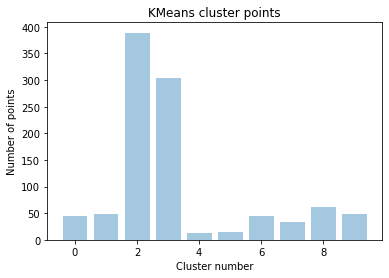

In [ ]:
# visually how points or reviews are distributed across 10 clusters 
data['Tfidf Clus Label'] = model_tf.labels_
plt.bar([x for x in range(10)], data.groupby(['Tfidf Clus Label'])['Reviews'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

In [ ]:
import gensim
list_of_sent_train=data['Reviews']
# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent_train,size=100, workers=4)
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

C:\Users\reddy\AppData\Local\Temp/ipykernel_17192/2552641619.py:17: RuntimeWarning: invalid value encountered in true_divide
  sent_vec /= cnt_words


(1000, 100)

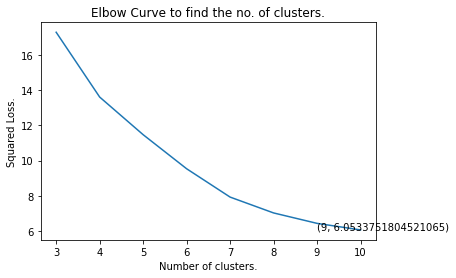

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  6.0533751804521065


In [ ]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [ ]:
minPts = 2 * 100
# Lower bound function copied from -> https://gist.github.com/m00nlight/0f9306b4d4e61ba0195f
def lower_bound(nums, target): # This function return the number in the array just greater than or equal to itself.
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching.
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l
def compute200thnearestneighbour(x, data): # Returns the distance of 200th nearest neighbour.
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) # computing distances.
        if(len(dists) == 200 and dists[199] > dist): # If distance is larger than current largest distance found.
            l = int(lower_bound(dists, dist)) # Using the lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] # Dist 199 contains the distance of 200th nearest neighbour.
twohundrethneigh = []
for val in sent_vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, sent_vectors[:1500]) )
twohundrethneigh.sort()

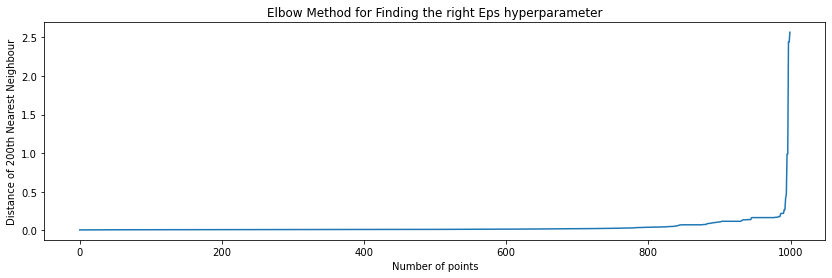

In [ ]:
# Plotting for the Elbow Method :
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

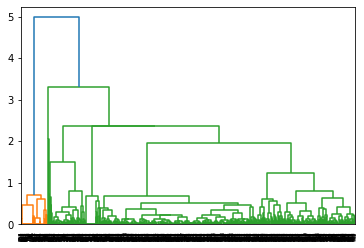

In [ ]:
#You can write you answer here. (No code needed)
from sklearn.cluster import DBSCAN
# Training DBSCAN :
model = DBSCAN(eps = 5, min_samples = minPts, n_jobs=-1)
model.fit(sent_vectors)
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(sent_vectors,method='ward'))
plt.axhline(y=35)# cut at 30 to get 5 clusters

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  #took n=5 from dendrogram curve 
Agg=cluster.fit_predict(sent_vectors)

In [ ]:
Agg

array([2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2,
       2, 3, 2, 2, 4, 0, 2, 2, 2, 2, 1, 3, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3,
       3, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 3,
       1, 2, 2, 1, 4, 1, 2, 3, 2, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 1, 2, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 4, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 4, 4, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2,
       2, 2, 2, 1, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,

# In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
We can undoubtedly characterize bunches into bunches utilizing K Means, and we can likewise decide the best number of groups and train the KMeans model utilizing the ideal number of groups, giving us the best model for arranging Reviews. Various leveled bunching is the subsequent best model, in spite of the fact that it will be very hard to characterize the gatherings utilizing Hierarchical grouping. DBScan gathered every one of the audits into a one bunch, which isn't the most proper fit.